# Language Model (AWD_LSTM)
This model learns the language by having encoder and decoder, essentially what we need is an encoder to provide 'states' of the sentence and feed into our classifier (in notebook 3b)

In [1]:
import pandas as pd
from fastai import *
from fastai.text import *

In [2]:
path = Path('/Users/jiajunkoh/projects/aa-nps')

In [3]:
data_lm = TextLMDataBunch.from_csv(path, 'data/preproc_nps_2018.csv')

In [ ]:
data_lm.show_batch()

In [5]:
data_lm.save('data/data_lm_export.pkl')

In [6]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.2)

In [7]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


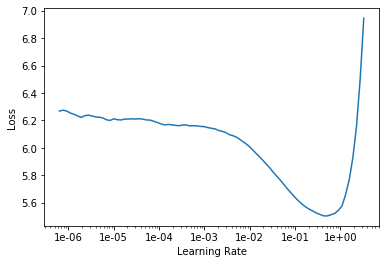

In [8]:
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(1, 8e-2, moms=(0.8, 0.7)) # explicitly give momentums
learn.save('awd_lstm_language_model_checkpoint_1')

epoch,train_loss,valid_loss,accuracy,time
0,3.908662,3.759942,0.318704,40:22


In [ ]:
learn.predict('The internet is very bad and ', 30, temperature=1.1, min_p=0.001)

In [11]:
learn.unfreeze()
learn.fit_one_cycle(1, 8e-3, moms=(0.8, 0.7))
learn.save('awd_lstm_language_model_checkpoint_2')

epoch,train_loss,valid_loss,accuracy,time
0,3.484826,3.463470,0.348804,1:19:11


In [ ]:
learn.predict('The web is very slow and ', 30, temperature=1.1, min_p=0.001)

In [13]:
learn.save_encoder('awd_lstm_encoder')

In [14]:
learn.export('models/awd_lstm_language_model.pkl')